<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/09-Bosques-Aleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Bosques Aleatorios
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [1]:
# Paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

#### <font color='264CC7'> Leer Datos </font>

In [2]:
# Cargar el archivo
df = pd.read_csv("https://raw.githubusercontent.com/niconlvs/ModelosML/refs/heads/main/transacciones.csv")
df.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,11,4,2024-11-04 08:08:08
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,27,6,2024-11-04 08:09:35
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,10,7,2024-11-04 08:07:04
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,5,5,2024-11-04 08:09:06
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,16,10,2024-11-04 08:06:39


#### <font color='264CC7'> Descripción </font>

In [3]:
print("🔹 Dimensión del DataFrame:", df.shape)

print("\n🔹 Valores Nulos por Columna:\n")
display(df.isnull().sum())

print("\n🔹 Estadísticos Descriptivos:\n")
display(df.describe())

🔹 Dimensión del DataFrame: (2512, 16)

🔹 Valores Nulos por Columna:



,0
TransactionAmount,0
TransactionType,0
Location,0
DeviceID,0
MerchantID,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0



🔹 Estadísticos Descriptivos:



,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966,16.626194,1.448248,15.827229,6.56250
std,291.946243,17.792198,69.963757,0.602662,3900.942499,0.731059,1.511310,8.761293,3.47559
min,0.260000,18.000000,10.000000,1.000000,101.250000,16.000000,0.000000,1.000000,1.00000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000,16.000000,0.000000,8.000000,3.00000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000,16.000000,1.000000,16.000000,7.00000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000,17.000000,3.000000,24.000000,10.00000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,18.000000,4.000000,31.000000,12.00000


#### <font color='264CC7'> Gráficos </font>

In [4]:
# Definir las columnas a usar
numeric_cols = [
    'TransactionAmount',
    'CustomerAge',
    'LoginAttempts',
    'AccountBalance',
    ]

cat_cols = [
    'TransactionType',
    'Channel',
    'CustomerOccupation'
    ]

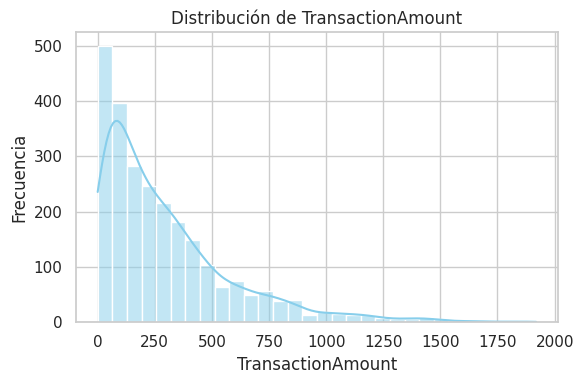

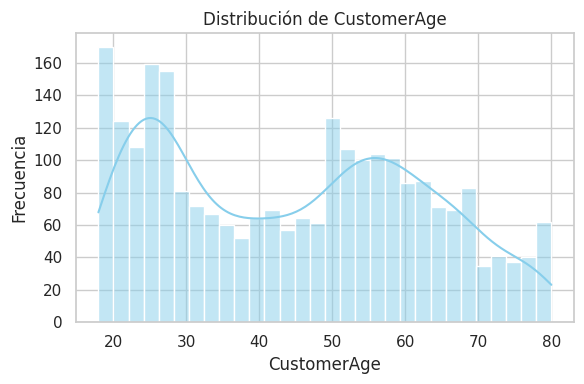

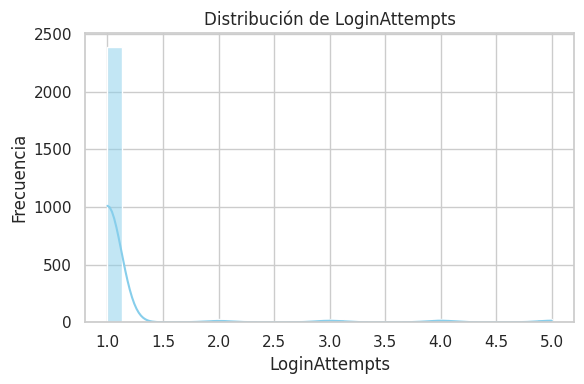

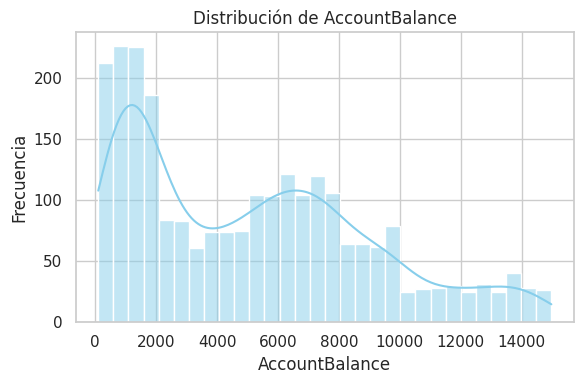

In [5]:
# Estilo bonito para los gráficos
sns.set(style="whitegrid")

# Crear un histograma para cada columna numérica
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

<ipython-input-6-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-6-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-6-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')


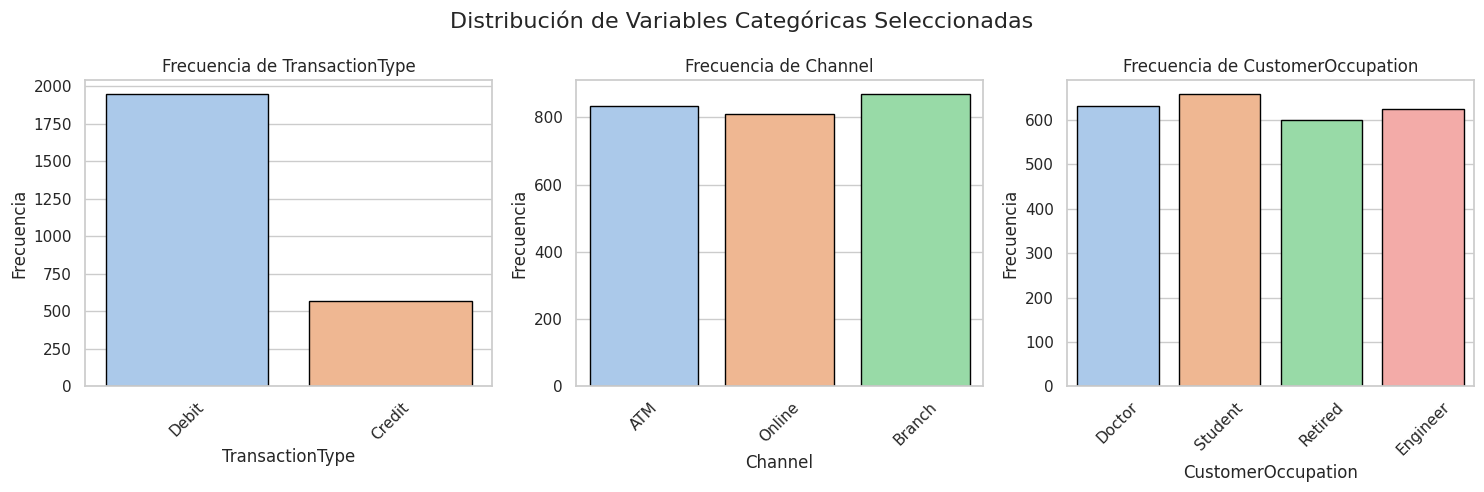

In [6]:
# Crear subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

plt.suptitle("Distribución de Variables Categóricas Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

#### <font color='264CC7'> Escalar Datos </font>

In [7]:
#eL RandomForestClassifier de scikit-learn no puede manejar texto sin procesar. Necesita que todas las variables independientes (X) sean numéricas.
df_encoded = pd.get_dummies(df, columns=['TransactionType', 'Channel', 'CustomerOccupation'], drop_first=True)


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

#### <font color='264CC7'> Entrenamiento del modelo </font>


In [8]:
# Define X y y
x = df_encoded[['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance'] +
               [col for col in df_encoded.columns if col.startswith('TransactionType_') or col.startswith('Channel_')]]
y = df['CustomerOccupation']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y )

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=76)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=76)

#### <font color='264CC7'> Evaluación del modelo</font>


In [9]:
# Hacer predicciones
y_pred = rf_model.predict(X_test)
print("\nPrecisión del Modelo:", accuracy_score(y_test, y_pred))


Precisión del Modelo: 0.7932405566600398



Matriz de Confusión:

[[ 77  27  22   0]
 [ 20  86  13   6]
 [  0  13 107   0]
 [  0   3   0 129]]


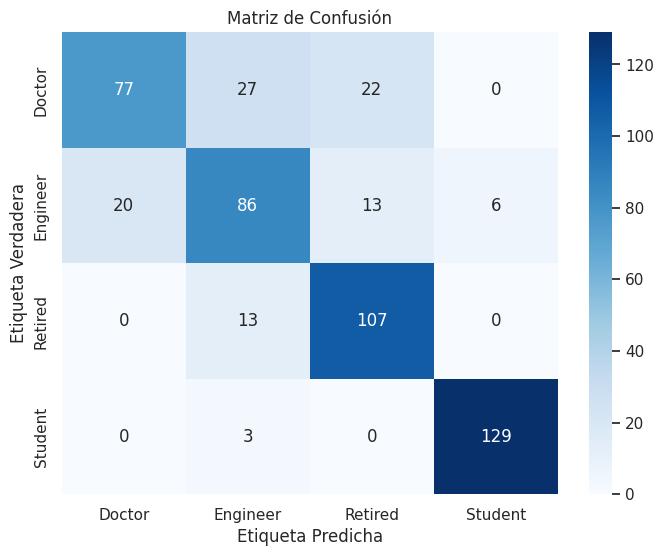

In [10]:
print("\nMatriz de Confusión:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizar Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [11]:
# Evaluar el modelo
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:

              precision    recall  f1-score   support

      Doctor       0.79      0.61      0.69       126
    Engineer       0.67      0.69      0.68       125
     Retired       0.75      0.89      0.82       120
     Student       0.96      0.98      0.97       132

    accuracy                           0.79       503
   macro avg       0.79      0.79      0.79       503
weighted avg       0.80      0.79      0.79       503



### <font color='264CC7'> Conclusiones </font>


El random forest obtuvo una precisión del 79.3%. Clasificó correctamente a estudiantes (f1-score: 0.97) y mostró un rendimiento aceptable en las demás clases, con recall de 0.61 para doctores, 0.69 para ingenieros y 0.89 para retirados. Su capacidad para manejar múltiples patrones de comportamiento bancario permitió una clasificación uniforme entre las ocupaciones.